In [53]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

## Practice Using PySpark to deal with the large dataset

In [127]:
%%time
from pyspark import SparkContext
from pyspark.sql import SQLContext
#sc = SparkContext()
sqlContext = SQLContext(sc)
spark_df = sqlContext.read.csv(os.path.join(data_path, filename), 
                               header = True, 
                               inferSchema = True)

CPU times: user 2.09 ms, sys: 1.71 ms, total: 3.79 ms
Wall time: 7.23 s


In [125]:
spark_df.printSchema()

root
 |-- REG_YYMM: integer (nullable = true)
 |-- CARD_SIDO_NM: string (nullable = true)
 |-- CARD_CCG_NM: string (nullable = true)
 |-- STD_CLSS_NM: string (nullable = true)
 |-- HOM_SIDO_NM: string (nullable = true)
 |-- HOM_CCG_NM: string (nullable = true)
 |-- AGE: string (nullable = true)
 |-- SEX_CTGO_CD: integer (nullable = true)
 |-- FLC: integer (nullable = true)
 |-- CSTMR_CNT: integer (nullable = true)
 |-- AMT: long (nullable = true)
 |-- CNT: integer (nullable = true)



In [126]:
spark_df.show(5, truncate = True)

+--------+------------+-----------+-------------------+-----------+----------+---+-----------+---+---------+-------+---+
|REG_YYMM|CARD_SIDO_NM|CARD_CCG_NM|        STD_CLSS_NM|HOM_SIDO_NM|HOM_CCG_NM|AGE|SEX_CTGO_CD|FLC|CSTMR_CNT|    AMT|CNT|
+--------+------------+-----------+-------------------+-----------+----------+---+-----------+---+---------+-------+---+
|  201901|        강원|     강릉시|건강보조식품 소매업|       강원|    강릉시|20s|          1|  1|        4| 311200|  4|
|  201901|        강원|     강릉시|건강보조식품 소매업|       강원|    강릉시|30s|          1|  2|        7|1374500|  8|
|  201901|        강원|     강릉시|건강보조식품 소매업|       강원|    강릉시|30s|          2|  2|        6| 818700|  6|
|  201901|        강원|     강릉시|건강보조식품 소매업|       강원|    강릉시|40s|          1|  3|        4|1717000|  5|
|  201901|        강원|     강릉시|건강보조식품 소매업|       강원|    강릉시|40s|          1|  4|        3|1047300|  3|
+--------+------------+-----------+-------------------+-----------+----------+---+-----------+---+---------+-------+---+
only s

## Simple EDA


In [128]:
%%time
data_path = os.path.join(os.getcwd(), "jeju_data_ver1")
filename = "201901-202003.csv"

df = pd.read_csv(os.path.join(data_path, filename))

CPU times: user 22.2 s, sys: 2.74 s, total: 24.9 s
Wall time: 25.5 s


In [3]:
df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


## Check null value

In [43]:
any(pd.isna(df.FLC))

False

In [56]:
for col in tqdm(df.columns):
    nan_cnt = sum(pd.isna(df[col]))
    print("{} has {} null values".format(col, nan_cnt))

100%|██████████| 12/12 [00:24<00:00,  2.08s/it]CNT has 0 null values



In [4]:
date_dict = df["REG_YYMM"].unique()
sido_dict = df["CARD_SIDO_NM"].unique()
ccg_dict = df["CARD_CCG_NM"].unique()
store_dict = df["STD_CLSS_NM"].unique()
age_dict = df["AGE"].unique()
sex_dict = df["SEX_CTGO_CD"].unique()

In [40]:
mu = np.mean(df["CSTMR_CNT"])
sigma = np.std(df["CSTMR_CNT"])
max_ccnt = np.max(df["CSTMR_CNT"])
almost_max = np.percentile(df["CSTMR_CNT"], 99.9)
print("mean: {}, standard deviation: {}".format(mu, sigma))
print("max: {}".format(max_ccnt))
print(almost_max)

mean: 61.96854913184142, standard deviation: 355.9175314649737
max: 32813
5197.0


In [38]:
Var = np.mean(np.square(df["CSTMR_CNT"]))
sigma = np.sqrt(Var)
print(sigma * 1.96)

708.0929364009762


(array([5642751., 6290070., 2811289., 1681775., 1136914.,  830333.,
         639516.,  510284.,  417500.,  349261.,  298349.,  256642.,
         223440.,  197422.,  175816.,  157198.,  141510.,  128631.,
         117481.,  107564.,   98235.,   91116.,   83833.,   78012.,
          72322.,   67409.,   62856.,   59356.,   55706.,   52750.,
          49607.,   46844.,   44490.,   41967.,   39961.,   38280.,
          36377.,   34407.,   33006.,   31734.,   30083.,   28640.,
          28041.,   26633.,   25614.,   24648.,   23741.,   22884.,
          22023.,   26456.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188., 192., 196., 200.]),
 <a list of 50 Patch objects>)

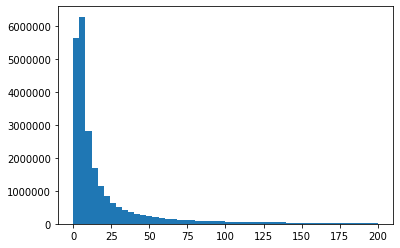

In [65]:
plt.hist((df["CSTMR_CNT"]), range = [0, 200], bins = 50)

In [74]:
mu = np.mean(df["CNT"])
sigma = np.std(df["CNT"])
max_ccnt = np.max(df["CNT"])
almost_max = np.percentile(df["CNT"], 99)
print("mean: {}, standard deviation: {}".format(mu, sigma))
print("max: {}".format(max_ccnt))
print(almost_max)

Var = np.mean(np.square(df["CNT"]))
sigma = np.sqrt(Var)
print(sigma * 2.56)

mean: 126.04497268419784, standard deviation: 966.9386881775627
max: 120357
2012.0
2496.3055557857087


(array([5034104., 5643265., 2772158., 1716832., 1194189.,  892431.,
         698024.,  561608.,  466657.,  394146.,  338378.,  293649.,
         256318.,  227493.,  203549.,  182194.,  164941.,  150453.,
         137496.,  125615.,  115657.,  107675.,   99204.,   93125.,
          86123.,   80497.,   76013.,   71229.,   66790.,   63081.,
          60030.,   56632.,   54004.,   51264.,   48565.,   46419.,
          44269.,   41921.,   40263.,   38831.,   36940.,   35282.,
          34409.,   32945.,   31367.,   30503.,   29171.,   28027.,
          27193.,   26097.,   25623.,   24870.,   23421.,   22866.,
          22326.,   21405.,   20719.,   20290.,   19529.,   18877.,
          18308.,   17825.,   17577.,   16894.,   16457.,   16169.,
          15774.,   15126.,   14795.,   14612.,   14161.,   13861.,
          13488.,   13406.,   12885.,   12728.,   12447.,   12004.,
          11812.,   11591.,   11345.,   10867.,   10768.,   10538.,
          10309.,   10160.,    9936.,    9769., 

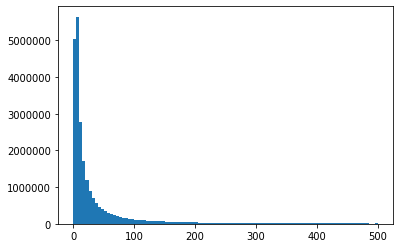

In [69]:
plt.hist((df["CNT"]), range = [0, 500], bins = 100)

In [20]:
from collections import defaultdict
upjong = defaultdict(list)
for i in store_dict:
    if i.endswith("업"):
        upjong[i.split()[-1]].append(i.split()[:-1])
        #upjong.add(i.split()[-1])
    else:
        upjong[i.split()[-1]].append([])
upjong

defaultdict(list,
            {'소매업': [['건강보조식품'],
              ['과실', '및', '채소'],
              ['관광', '민예품', '및', '선물용품'],
              ['그외', '기타', '종합'],
              ['기타', '대형', '종합'],
              ['빵', '및', '과자류'],
              ['수산물'],
              ['육류'],
              ['화장품', '및', '방향제']],
             '운영업': [['골프장'], ['그외', '기타', '스포츠시설'], ['차량용', '주유소'], ['휴양콘도']],
             '음식점업': [['기타', '외국식'],
              ['서양식'],
              ['일식'],
              ['중식'],
              ['피자', '햄버거', '샌드위치', '및', '유사'],
              ['한식']],
             '주점업': [['기타'], ['일반유흥']],
             '기타음식료품위주종합소매업': [[]],
             '마사지업': [[]],
             '음료점업': [['비알콜']],
             '슈퍼마켓': [[]],
             '임대업': [['스포츠', '및', '레크레이션', '용품'], ['자동차']],
             '여관업': [[]],
             '욕탕업': [[]],
             '대행업': [['전시', '및', '행사']],
             '충전업': [['차량용', '가스']],
             '편의점': [[]],
             '호텔업': [[]],
             '여행사업': [[]],
      

## 전처리 Scheme
1. 주소의 경우 kakao maps api를 통해 위도, 경도로 바꾼다.
2. 업종의 경우 factorize 시킨 one-hot으로 간다?

In [91]:
kdapi_token_path = "/Users/kakao/kakao_project/credentials/KakaoAK"
with open(kdapi_token_path, "r", encoding = "utf-8") as f:
    AK = f.readline().strip()

In [95]:
import requests
address = "제주시 아라동"
response = requests.get(
    url = "https://dapi.kakao.com/v2/local/search/address.json",
    params = {"query": address},
    headers = {"Authorization": "KakaoAK {}".format(AK)})


In [96]:
response.json()["documents"][0]["y"]

'33.4763364525424'

## Test Encoder

In [83]:
from importlib import reload
import utils
reload(utils)
from utils import Encoder

In [85]:
encoder = Encoder.from_raw_data(os.path.join(data_path, "201901-202003.csv"))